# EDA

In [1]:
# Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1.  Problem statement and data collection

Description of the problem:

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

In [2]:
df = pd.read_csv("../data/raw/demographic_health_data.csv")
df.head(4)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2


## 2. Exploration and data cleaning 

### 2.1 Summarize DF

In [3]:
#Display the info
print(f'Total data Shape: {df.shape}')
print(df.info())

Total data Shape: (3140, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None


In [4]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

No Null values found.

### 2.2 Eliminate duplicates

In [5]:
#Check for duplicate rows
duplicates = df[df.duplicated()]
print(f'Total duplicate rows: {duplicates.shape[0]}')

Total duplicate rows: 0


In [6]:
duplicates.head() 

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code


In [7]:
#Drop duplicate rows and keep the first occurrence
df = df.drop_duplicates()

#Confirm if duplicates are removed
print(f'Data shape after removing duplicates: {df.shape}')

Data shape after removing duplicates: (3140, 108)


### 2.3 Eliminate irrelevant information

In [8]:
df.drop(columns=['fips', 'COUNTY_NAME', 'STATE_NAME'], inplace=True)

In [9]:
print(df.columns)

Index(['TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop', '40-49',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=105)


In [10]:
df['over_65'] = df[['60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop']].sum(axis=1)

df['working_age'] = df[['20-29 y/o % of total pop', '30-39 y/o % of total pop', 
                        '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop']].sum(axis=1)
age_columns = ['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', 
               '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', 
               '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop']
df.drop(columns=age_columns, inplace=True)

In [11]:
change_columns = ['N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018']
df.drop(columns=change_columns, inplace=True)

In [12]:
education_columns = ['Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 
                     'Some college or associate\'s degree 2014-18', 'Bachelor\'s degree or higher 2014-18']
df.drop(columns=education_columns, inplace=True)

In [13]:
economic_columns = ['CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018']
df.drop(columns=economic_columns, inplace=True)

In [14]:
medical_infrastructure_columns = ['Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 
                                  'Active General Surgeons per 100000 Population 2018 (AAMC)']
df.drop(columns=medical_infrastructure_columns, inplace=True)

## 3. Univariate Analysis 

In [15]:
#Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: []
Numerical columns: ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'Unemployed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Active Physicians per 100000 Populati

### 3.1 Categorical Variable Analysis 

### 3.2 Numerical Variable Analysis 

In [16]:
#Display summary statistics for numerical columns
df[numerical_columns].describe()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,over_65,working_age
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,...,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350,26.315407,62.301156
std,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,...,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447,5.757331,2.993179
min,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,...,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000,6.898165,49.796511
25%,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,...,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000,22.570031,60.599932
50%,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,1160.000000,...,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000,26.011080,62.363097
75%,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,2899.750000,...,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000,29.475033,63.997214
max,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,356275.000000,...,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000,66.414247,84.204089


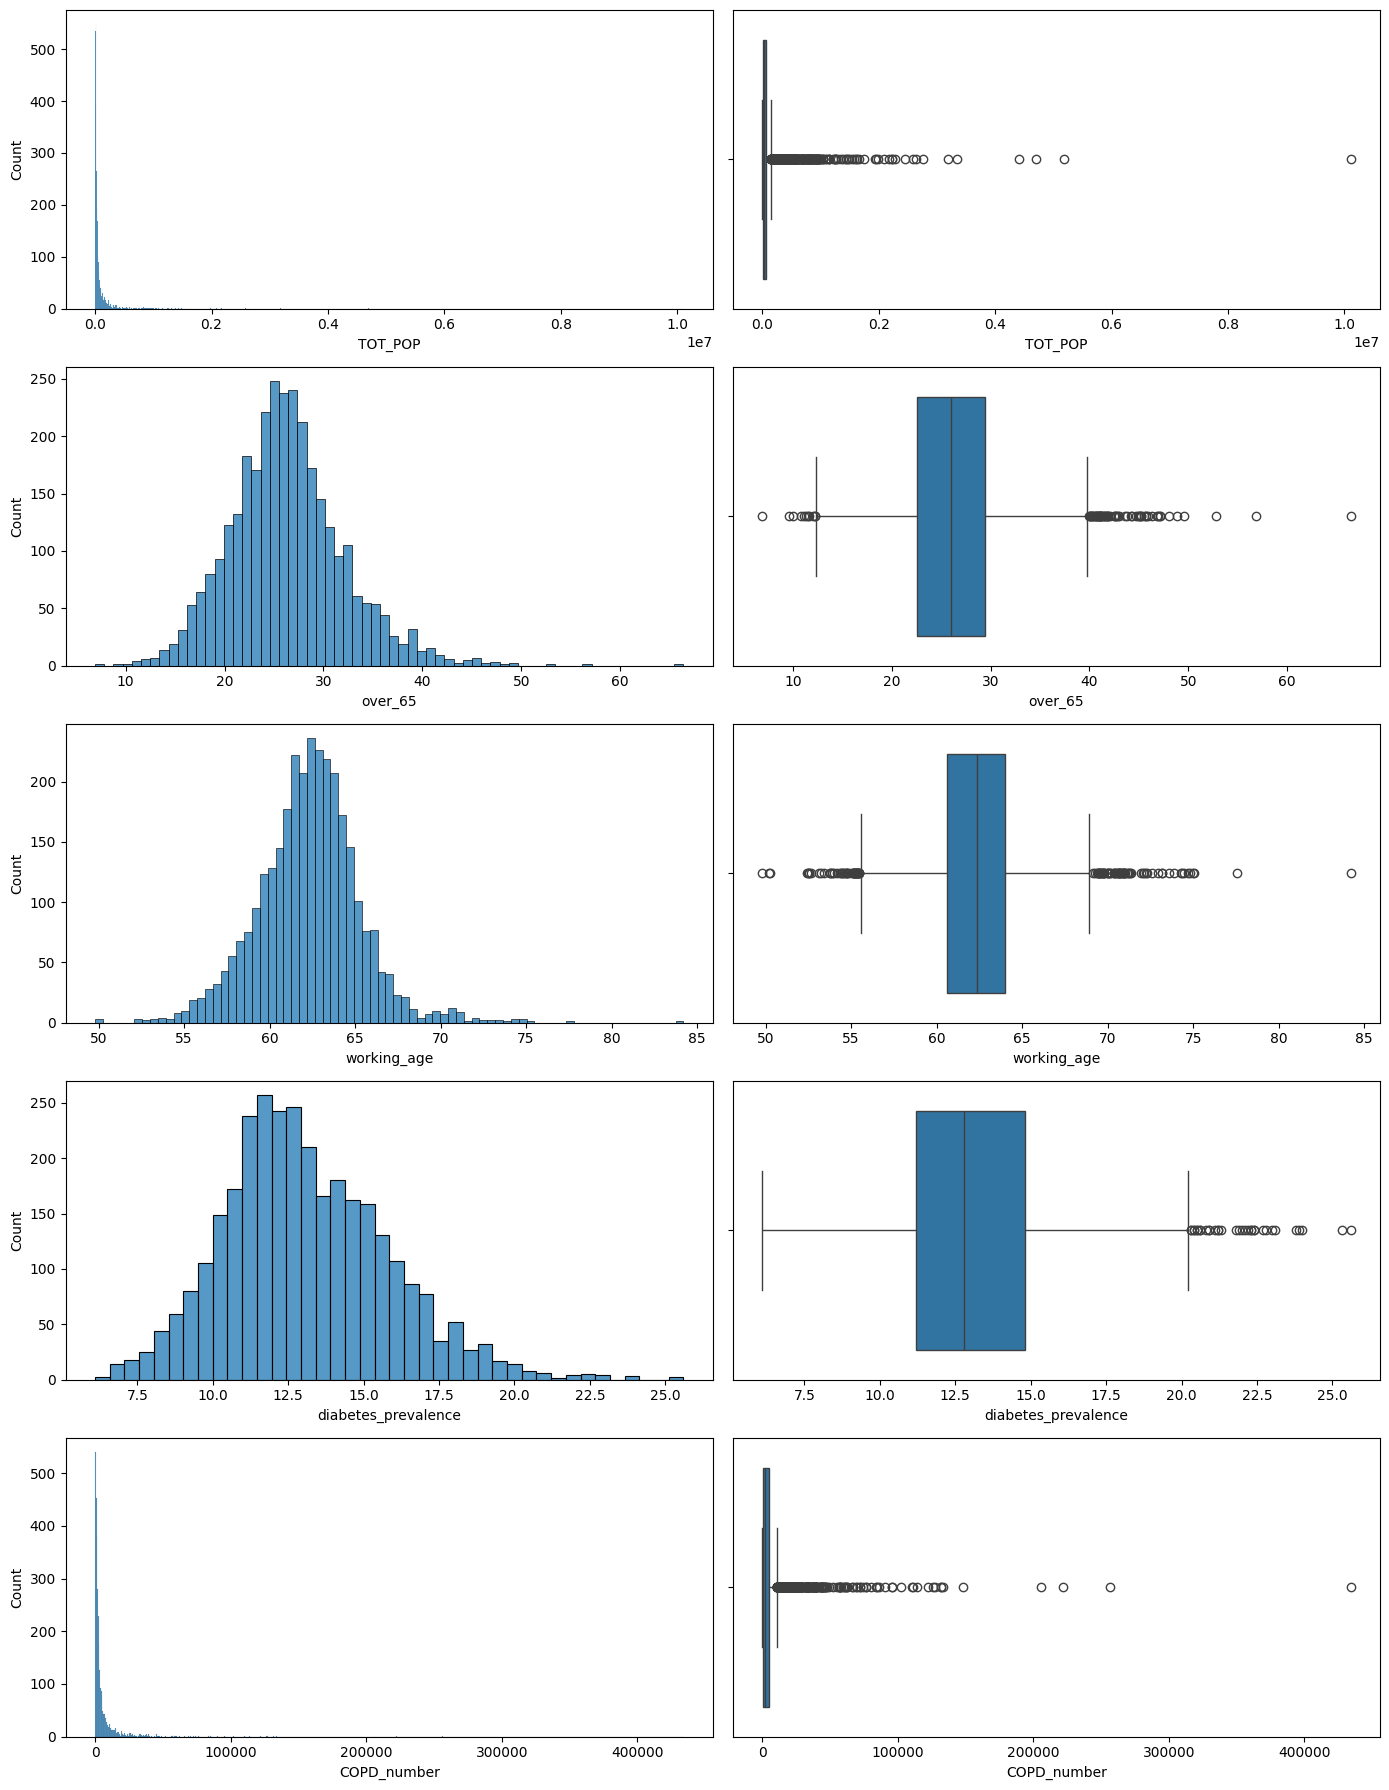

In [17]:
fig, ax = plt.subplots(5, 2, figsize=(14, 18))

sns.histplot(data=df, x='TOT_POP', ax=ax[0, 0])
sns.boxplot(data=df, x='TOT_POP', ax=ax[0, 1])

sns.histplot(data=df, x='over_65', ax=ax[1, 0])
sns.boxplot(data=df, x='over_65', ax=ax[1, 1])

sns.histplot(data=df, x='working_age', ax=ax[2, 0])
sns.boxplot(data=df, x='working_age', ax=ax[2, 1])

sns.histplot(data=df, x='diabetes_prevalence', ax=ax[3, 0])
sns.boxplot(data=df, x='diabetes_prevalence', ax=ax[3, 1])

sns.histplot(data=df, x='COPD_number', ax=ax[4, 0])
sns.boxplot(data=df, x='COPD_number', ax=ax[4, 1])

plt.tight_layout()
plt.show()

## 4. Multivariate Analysis 

### 4.1 Numerical - Numerical Analysis

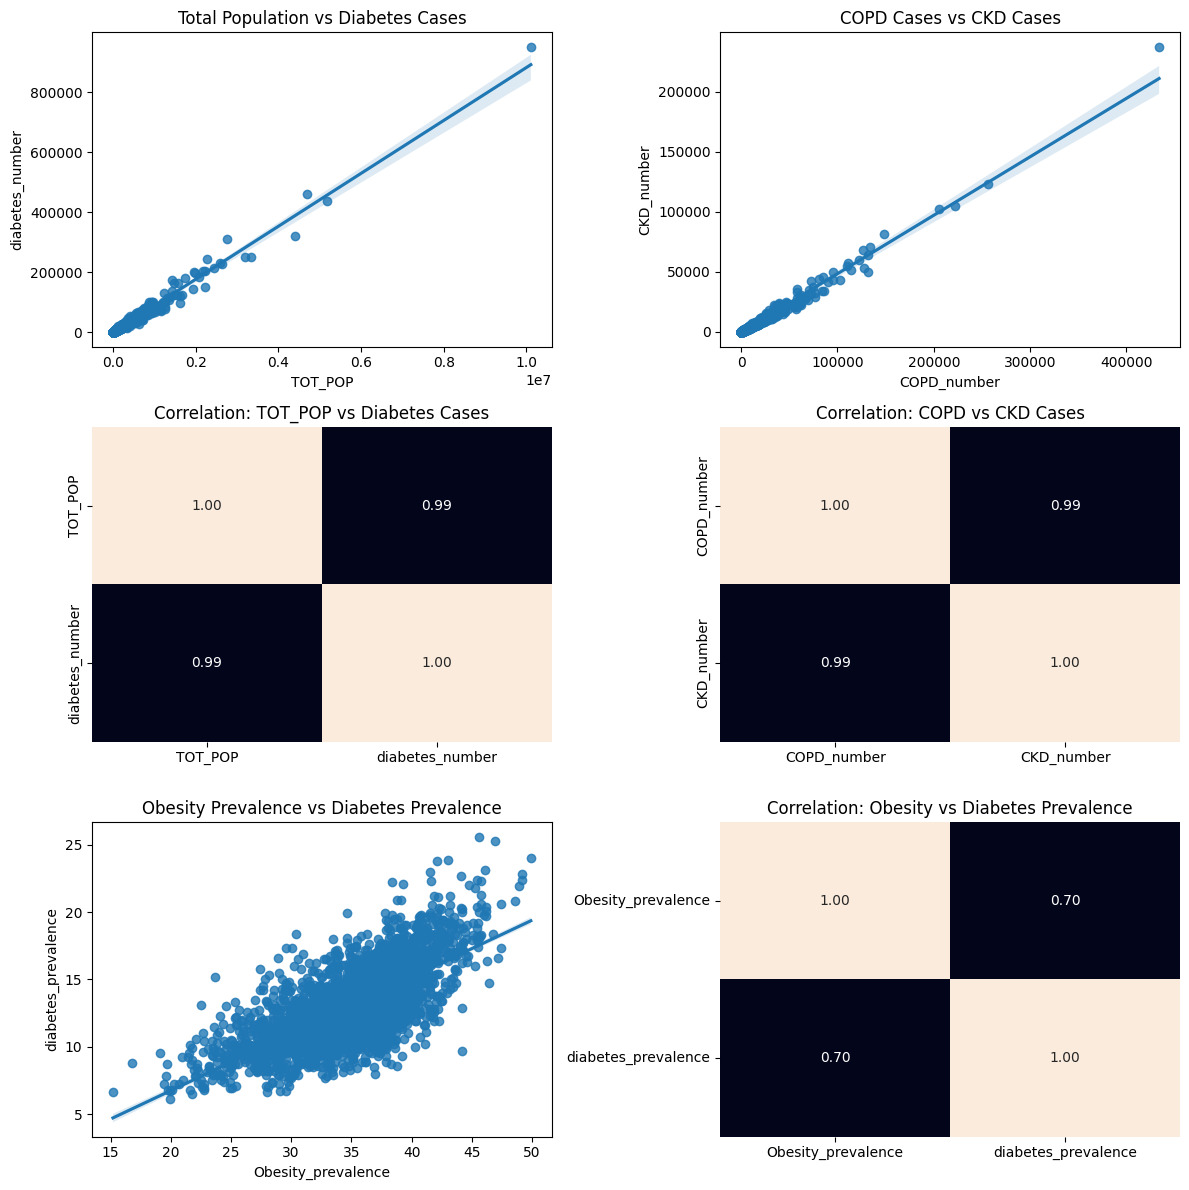

In [18]:
fig, axis = plt.subplots(3, 2, figsize=(12, 12))

#TOT_POP vs diabetes_number
sns.regplot(ax=axis[0, 0], data=df, x="TOT_POP", y="diabetes_number")
axis[0, 0].set_title("Total Population vs Diabetes Cases")
sns.heatmap(df[["TOT_POP", "diabetes_number"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_title("Correlation: TOT_POP vs Diabetes Cases")

#COPD_number vs CKD_number
sns.regplot(ax=axis[0, 1], data=df, x="COPD_number", y="CKD_number")
axis[0, 1].set_title("COPD Cases vs CKD Cases")
sns.heatmap(df[["COPD_number", "CKD_number"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation: COPD vs CKD Cases")

#Obesity_prevalence vs diabetes_prevalence
sns.regplot(ax=axis[2, 0], data=df, x="Obesity_prevalence", y="diabetes_prevalence")
axis[2, 0].set_title("Obesity Prevalence vs Diabetes Prevalence")
sns.heatmap(df[["Obesity_prevalence", "diabetes_prevalence"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[2, 1].set_title("Correlation: Obesity vs Diabetes Prevalence")

plt.tight_layout()
plt.show()

### 4.2 Categorical - categorical analysis

### 4.3 Other mixed analysis


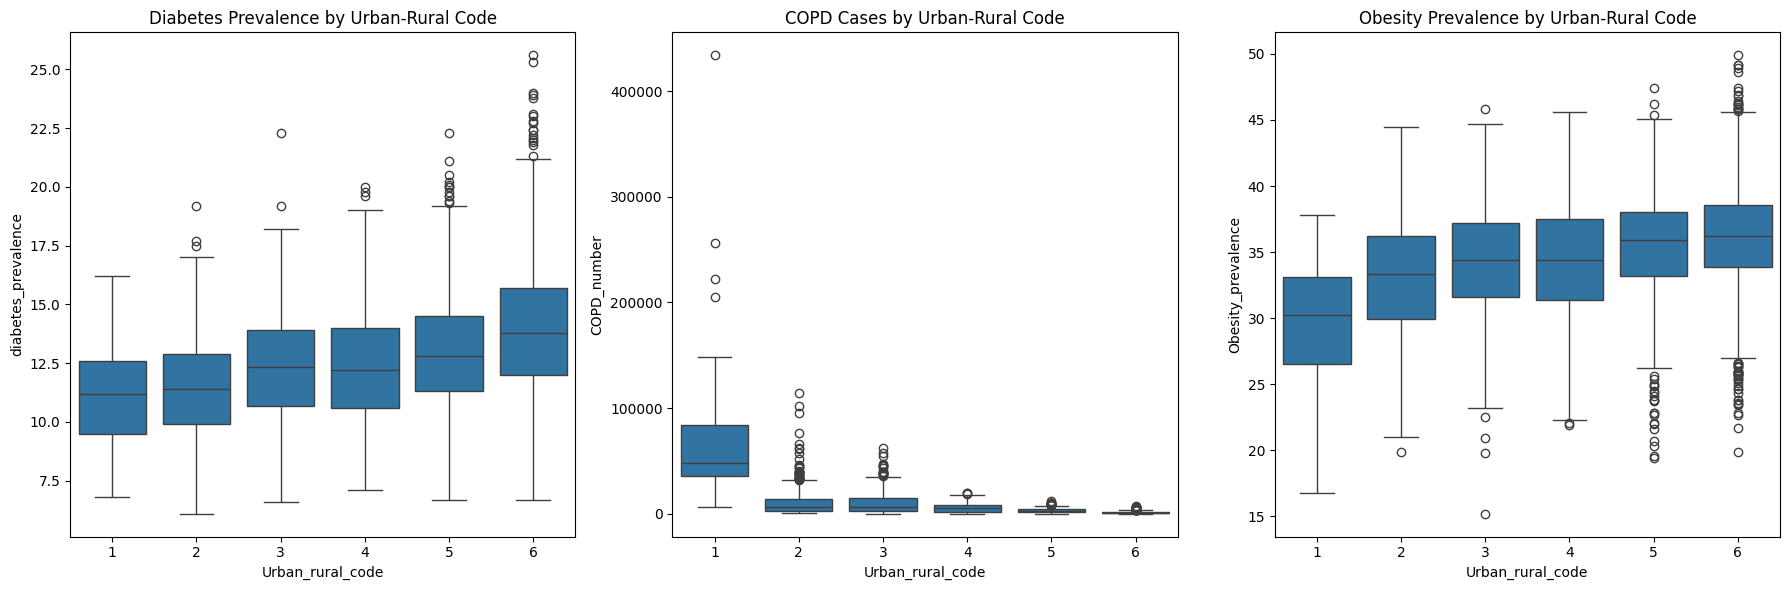

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

#Box plot for diabetes prevalence by urban-rural classification
sns.boxplot(data=df, x="Urban_rural_code", y="diabetes_prevalence", ax=ax[0])
ax[0].set_title("Diabetes Prevalence by Urban-Rural Code")

#Box plot for COPD cases by urban-rural classification
sns.boxplot(data=df, x="Urban_rural_code", y="COPD_number", ax=ax[1])
ax[1].set_title("COPD Cases by Urban-Rural Code")

#Box plot for Obesity prevalence by urban-rural classification
sns.boxplot(data=df, x="Urban_rural_code", y="Obesity_prevalence", ax=ax[2])
ax[2].set_title("Obesity Prevalence by Urban-Rural Code")

plt.tight_layout()
plt.show()

### 4.4 Encoding Categorical Values and Saving JSON files

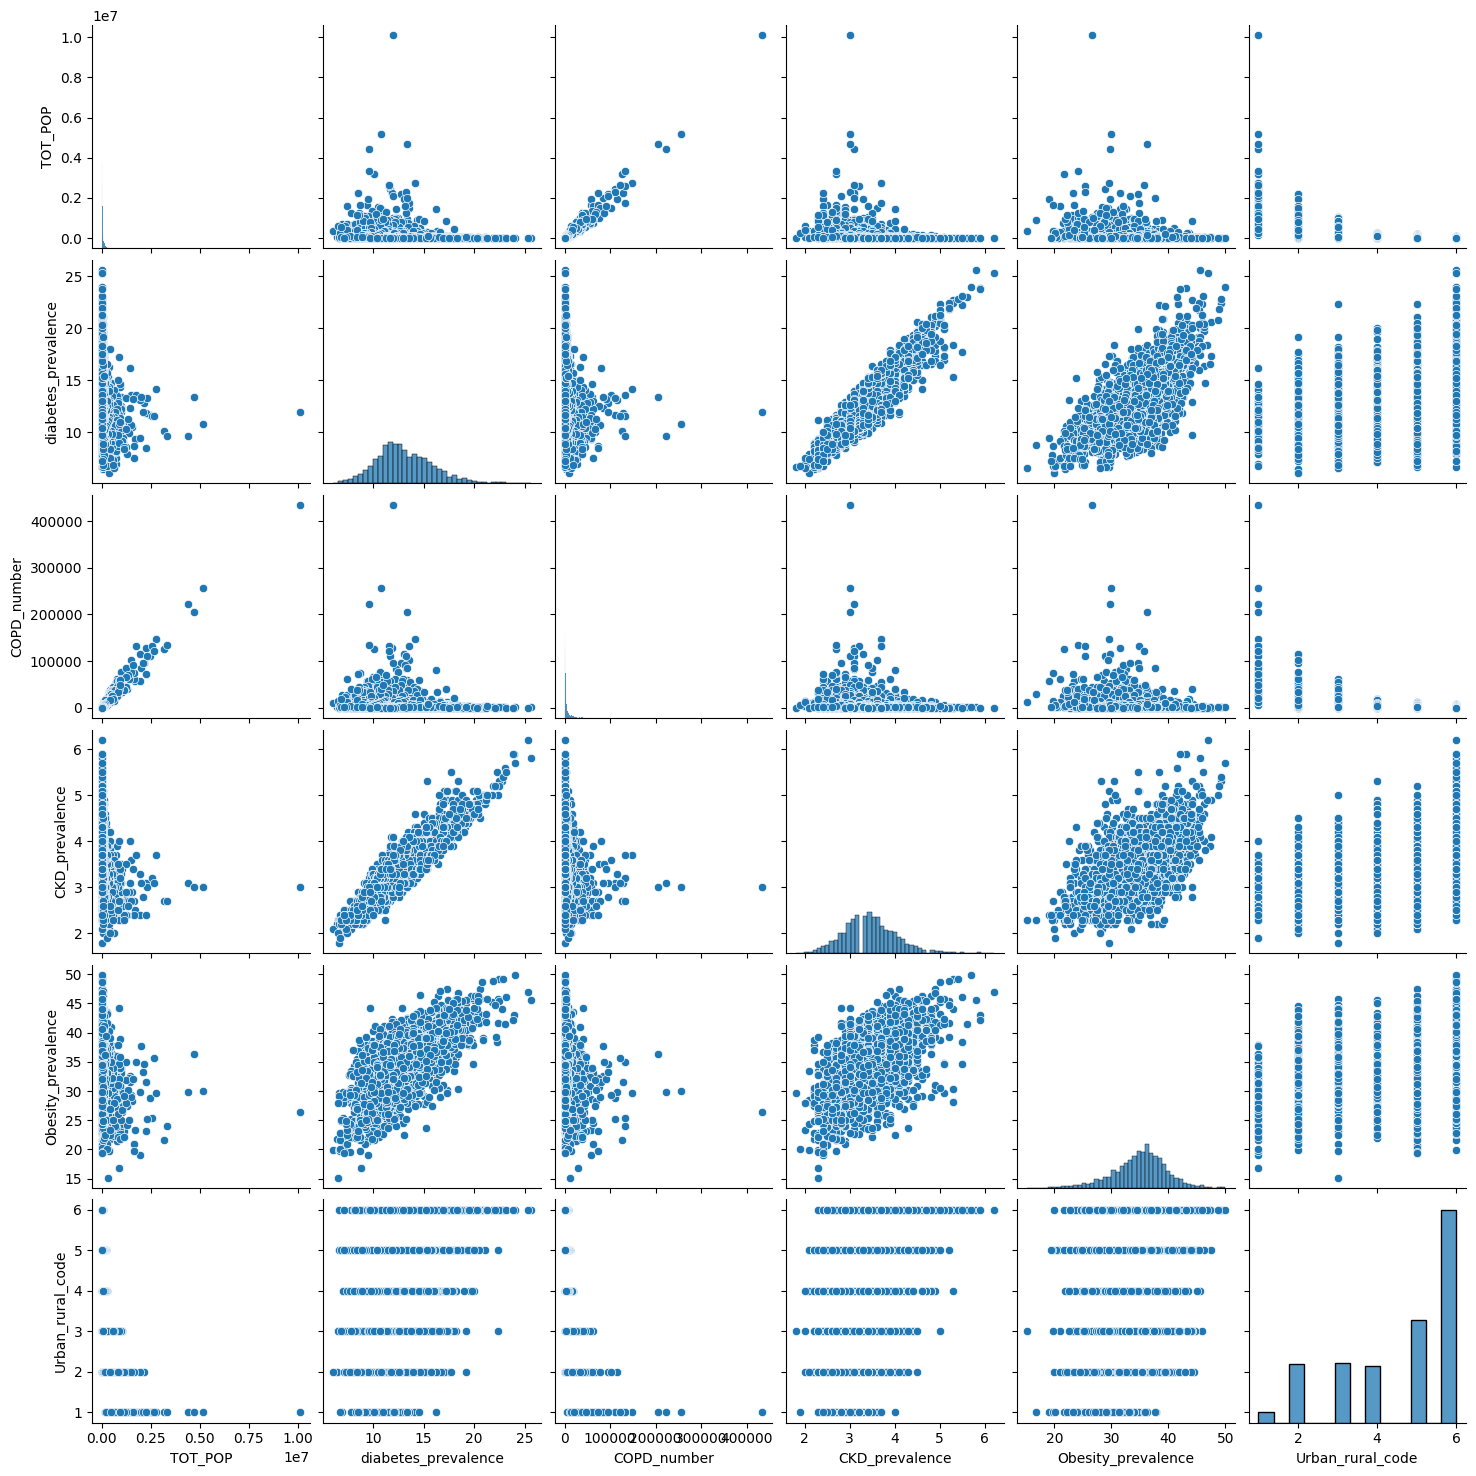

In [20]:
selected_columns = ['TOT_POP', 'diabetes_prevalence', 'COPD_number', 'CKD_prevalence', 'Obesity_prevalence', 'Urban_rural_code']
sns.pairplot(data=df_encoded[selected_columns])
plt.show()

### 4.5 Corr matrix

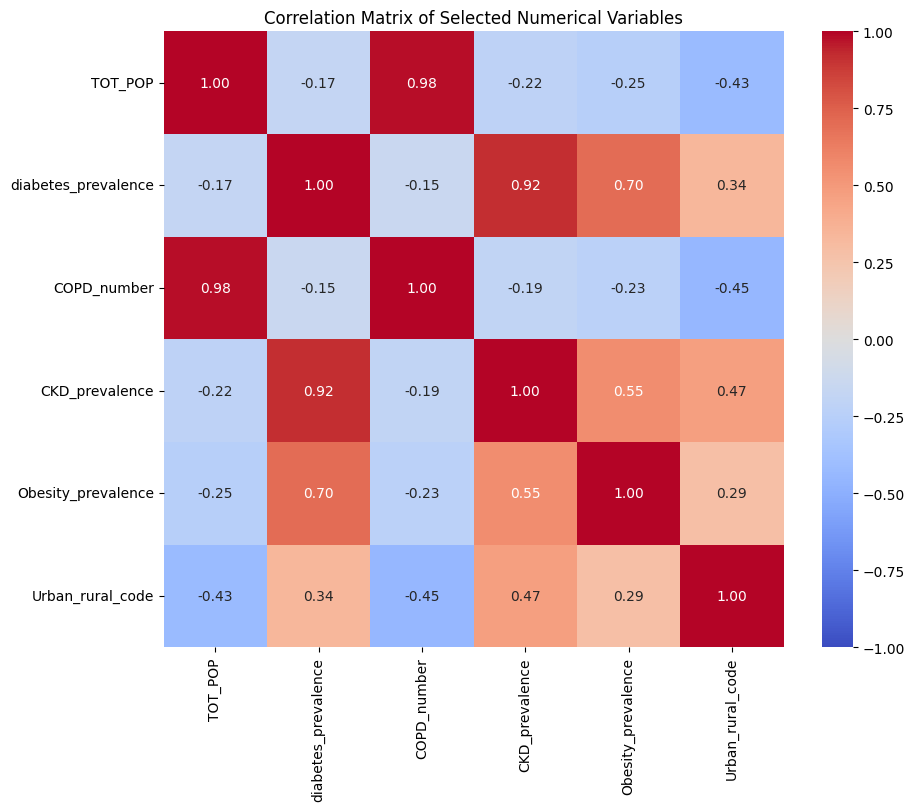

In [22]:
# Selecciona solo algunas columnas numéricas importantes
selected_columns = ['TOT_POP', 'diabetes_prevalence', 'COPD_number', 'CKD_prevalence', 'Obesity_prevalence', 'Urban_rural_code']
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.show()

## 5. Feature Engineering 

In [25]:
df.describe()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,over_65,working_age
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,...,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350,26.315407,62.301156
std,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,...,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447,5.757331,2.993179
min,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,...,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000,6.898165,49.796511
25%,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,...,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000,22.570031,60.599932
50%,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,1160.000000,...,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000,26.011080,62.363097
75%,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,2899.750000,...,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000,29.475033,63.997214
max,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,356275.000000,...,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000,66.414247,84.204089


In [27]:
df['working_age_ratio'] = df['working_age'] / df['TOT_POP']

In [ ]:
df['over_65_ratio'] = df['over_65'] / df['TOT_POP']

In [30]:
df['over_65_diabetes'] = df['over_65_ratio'] * df['diabetes_prevalence']

In [29]:
df['diabetes_ratio'] = df['diabetes_number'] / df['TOT_POP']
df['COPD_ratio'] = df['COPD_number'] / df['TOT_POP']

In [34]:
print(df.columns)

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', '% White-alone', 'Black-alone pop',
       '% Black-alone', 'Native American/American Indian-alone pop',
       '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018',
       'MEDHHINC_2018', 'Unemployed_2018', 'Unemployment_rate_2018',
       'Median_Household_Income_2018',
       'Med_HH_Income_Percent

### 5.1 Outlier Analysis

In [35]:
# Crear la columna comorbidity_risk como la suma de prevalencias de condiciones de salud
df['comorbidity_risk'] = (
    df['diabetes_prevalence'] + 
    df['COPD_prevalence'] + 
    df['CKD_prevalence'] +
    df['Obesity_prevalence']  # Añadir otras prevalencias si es relevante
)

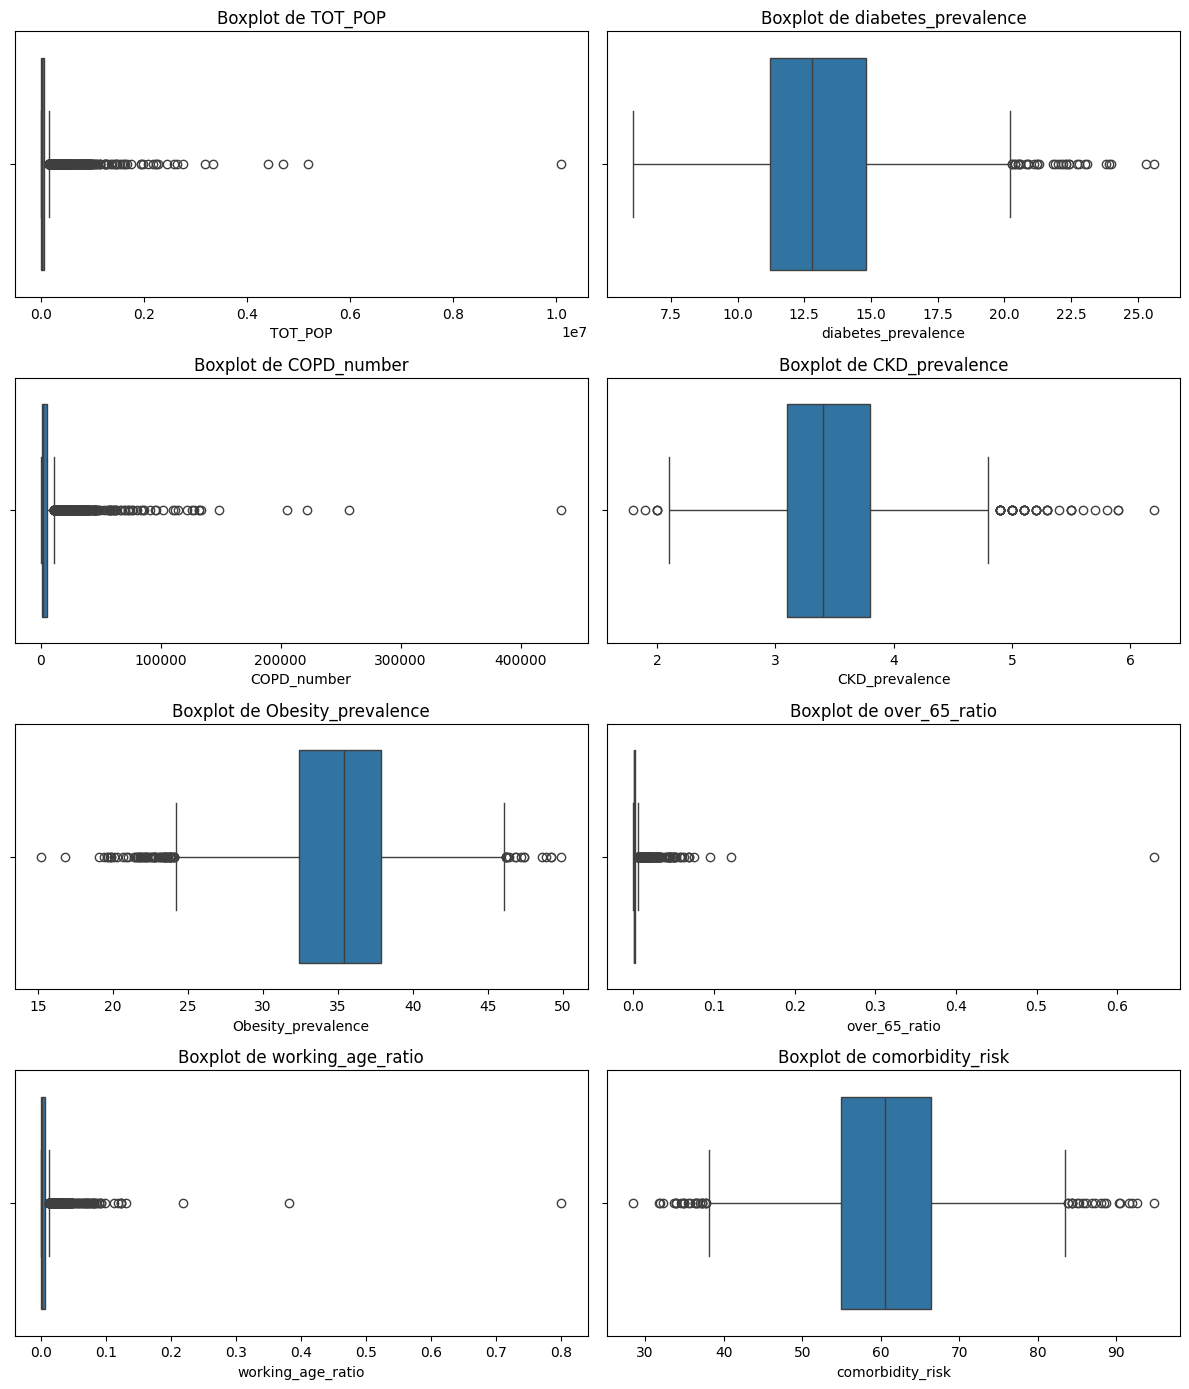

In [36]:

# Configura una figura con subplots para visualizar los outliers con boxplots
fig, ax = plt.subplots(4, 2, figsize=(12, 14))

# Agrega boxplots para cada columna individualmente
sns.boxplot(ax=ax[0, 0], data=df, x='TOT_POP')
ax[0, 0].set_title('Boxplot de TOT_POP')

sns.boxplot(ax=ax[0, 1], data=df, x='diabetes_prevalence')
ax[0, 1].set_title('Boxplot de diabetes_prevalence')

sns.boxplot(ax=ax[1, 0], data=df, x='COPD_number')
ax[1, 0].set_title('Boxplot de COPD_number')

sns.boxplot(ax=ax[1, 1], data=df, x='CKD_prevalence')
ax[1, 1].set_title('Boxplot de CKD_prevalence')

sns.boxplot(ax=ax[2, 0], data=df, x='Obesity_prevalence')
ax[2, 0].set_title('Boxplot de Obesity_prevalence')

sns.boxplot(ax=ax[2, 1], data=df, x='over_65_ratio')
ax[2, 1].set_title('Boxplot de over_65_ratio')

sns.boxplot(ax=ax[3, 0], data=df, x='working_age_ratio')
ax[3, 0].set_title('Boxplot de working_age_ratio')

sns.boxplot(ax=ax[3, 1], data=df, x='comorbidity_risk')
ax[3, 1].set_title('Boxplot de comorbidity_risk')

plt.tight_layout()
plt.show()

Outlier Analysis: Boxplots show signifcant outliers in top_pop and COPD_number, indicaing some 
Los boxplots muestran outliers significativos en TOT_POP y COPD_number, indicando algunos counties with high balues. Variables like diabetes_prevalence, CKD_prevalence, and Obesity_prevalence have few outliers, showing more consistent distributions. In over_65_ratio and working_age_ratio we can see outiers, but mayority of values in low ranges.

In [37]:
#Creating a copy of our df to remove outliers 
df_no = df.copy()

In [41]:
# Función para eliminar o limitar outliers de una columna específica
def remove_outliers(df, feature_name, allow_neg=True):
    x = df[feature_name]
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr * 1.5)
    lower_lim = q1 - (iqr * 1.5) if allow_neg else max(0, q1 - (iqr * 1.5))
    
    # Aplicar los límites para reemplazar los outliers
    df[feature_name] = x.apply(lambda val: upper_lim if (val > upper_lim) else (lower_lim if (val < lower_lim) else val))
    
    # Guarda los límites en un archivo JSON
    filename = f'./ENC/outliers_lims_{feature_name}.json'
    with open(filename, 'w') as f:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, f)
    
    return df[feature_name]

In [42]:
# Aplicar la función a cada columna de forma individual
df_no['TOT_POP'] = remove_outliers(df_no, 'TOT_POP')
df_no['diabetes_prevalence'] = remove_outliers(df_no, 'diabetes_prevalence')
df_no['COPD_number'] = remove_outliers(df_no, 'COPD_number')
df_no['CKD_prevalence'] = remove_outliers(df_no, 'CKD_prevalence')
df_no['Obesity_prevalence'] = remove_outliers(df_no, 'Obesity_prevalence')
df_no['over_65_ratio'] = remove_outliers(df_no, 'over_65_ratio')
df_no['working_age_ratio'] = remove_outliers(df_no, 'working_age_ratio')
df_no['comorbidity_risk'] = remove_outliers(df_no, 'comorbidity_risk')

### 5.2 Missing Values

In [44]:
df_no.isna().sum()

TOT_POP             0
0-9                 0
19-Oct              0
20-29               0
30-39               0
                   ..
over_65_ratio       0
diabetes_ratio      0
COPD_ratio          0
over_65_diabetes    0
comorbidity_risk    0
Length: 89, dtype: int64

### 5.3 Split train/test of both Data Frames

In [57]:
# Define la función de división
def split(target, df, test_size=0.2, random_state=123):
    # Separa las características (X) y el objetivo (y)
    X = df.drop(columns=target)
    y = df[target]
    
    # Realiza la división en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Devuelve los conjuntos de entrenamiento y prueba
    return X_train, X_test, y_train, y_test

In [58]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('diabetes_prevalence', df)
X_train_without_outliers, X_test_without_outliers, _, _ = split('diabetes_prevalence', df_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

### 5.4 Normalization

In [59]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)  

    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'./ENC/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm


In [60]:
X_train_norm_with_outliers, X_test_norm_with_outliers = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')

X_train_norm_without_outliers, X_test_norm_without_outliers = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

### 5.5 Min-Max Scaling

In [61]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'./ENC/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [62]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 6. Feature Selection 

In [63]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train) 

    cols = selection_model.get_support()  
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    # Guarda el modelo de selección de características para uso futuro
    dump(selection_model, open(f'./ENC/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel


In [64]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 7, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 7, 'without_outliers')

### 6.1 Applying the filter to the normalized and minmax scaled data frames

In [66]:
# Normalización de los conjuntos de datos
X_train_norm_with_outliers, X_test_norm_with_outliers = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_norm_without_outliers, X_test_norm_without_outliers = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# Escalado MinMax de los conjuntos de datos
X_train_minmax_with_outliers, X_test_minmax_with_outliers = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_minmax_without_outliers, X_test_minmax_without_outliers = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

In [67]:
# Selección de características de los conjuntos normalizados
X_train_with_outliers_norm_sel = X_train_norm_with_outliers[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_norm_without_outliers[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_norm_with_outliers[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_norm_without_outliers[X_test_without_outliers_sel.columns]

# Selección de características de los conjuntos escalados con MinMax
X_train_with_outliers_minmax_sel = X_train_minmax_with_outliers[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_minmax_without_outliers[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_minmax_with_outliers[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_minmax_without_outliers[X_test_without_outliers_sel.columns]

### 6.2 Saving the CSV files

In [69]:
dfs_train = [
    X_train_with_outliers_sel,            
    X_train_without_outliers_sel,          
    X_train_with_outliers_norm_sel,        
    X_train_without_outliers_norm_sel,     
    X_train_with_outliers_minmax_sel,      
    X_train_without_outliers_minmax_sel     
]


dfs_test = [
    X_test_with_outliers_sel,              
    X_test_without_outliers_sel,          
    X_test_with_outliers_norm_sel,         
    X_test_without_outliers_norm_sel,      
    X_test_with_outliers_minmax_sel,       
    X_test_without_outliers_minmax_sel 
]

In [70]:
# Guardar los conjuntos de datos de entrenamiento
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Guardar los conjuntos de datos de prueba
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)


# REGULARIZED LINEAR. REG.

In [72]:
import pandas as pd

# Cargar los datos de entrenamiento y prueba para una versión (e.g., con outliers y normalizada)
X_train = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_test = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [73]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Configuración del modelo Lasso
lasso_model = Lasso(alpha=0.1, max_iter=300, random_state=123)

# Entrenamiento del modelo
lasso_model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test)

# Evaluación del modelo
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f'Lasso Model - MSE: {lasso_mse}, R2: {lasso_r2}')

Lasso Model - MSE: 0.01083018955100683, R2: 0.9984458087790087


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.306e+00, tolerance: 1.892e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

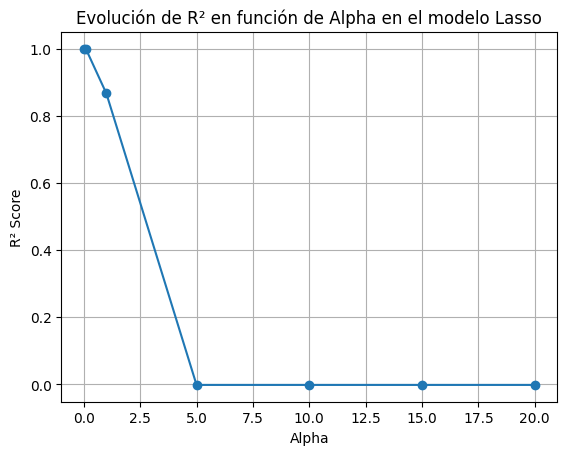

In [74]:
import matplotlib.pyplot as plt

alphas = [0.0, 0.1, 1.0, 5.0, 10.0, 15.0, 20.0]
r2_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=300, random_state=123)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Gráfico de R² vs. Alpha
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Evolución de R² en función de Alpha en el modelo Lasso')
plt.grid(True)
plt.show()

R² and alpha value: When Alpha is very low, Lasso adjust very good its data, reaching an R² close to 1, which means the model is doing a good job predicting.

Effect of increasing alpha: As the value of alpha increases, the Lasso model starts to penalize too much, reducing the coefficients of the variables almost to zero.

Conclusion: For this model, a small alpha is ideal, as it achieves a good balance between a well-fitted model and a moderate penalty that prevents overfitting.